# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un vehículo como baratos y caros.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
# Cargo la base de datos (reemplaza 'nombre_archivo.csv' con el nombre real de tu archivo)
cars = pd.read_csv(r'C:\Users\mjvm0\OneDrive\Documentos\Proyecto integrador\Data\ML_cars.csv')

# Reviso el tipo de cada columna
tipos_de_datos = cars.dtypes

# Imprimo los tipos de datos
print(tipos_de_datos)


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
#llamo el dataset a analizar CSV
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
cars.shape

(205, 26)

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [11]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['car_ID']
# 'car_ID': No aporta información relevante para la clasificación de vehículos como baratos o caros.

# Elimino las columnas
cars = cars.drop(columnas_a_eliminar, axis=1)

# Muestro el DataFrame resultante
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


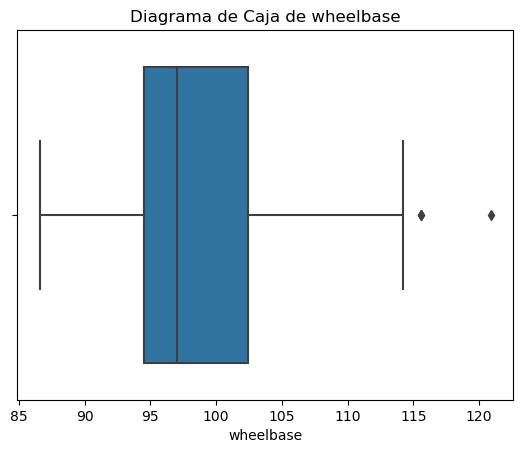

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


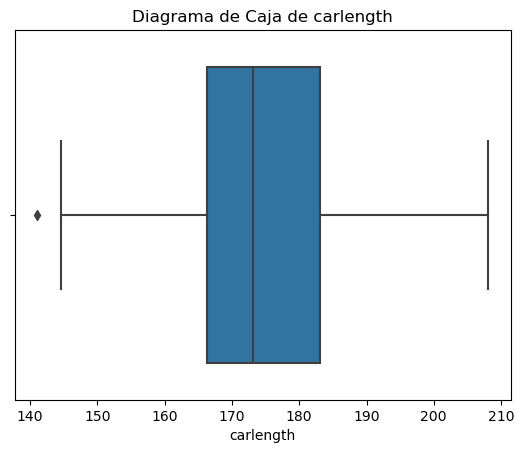

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


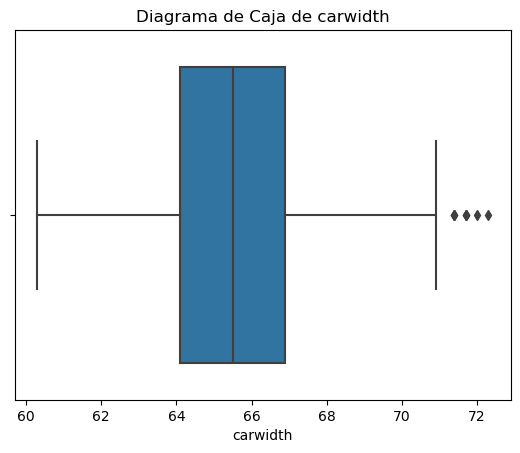

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


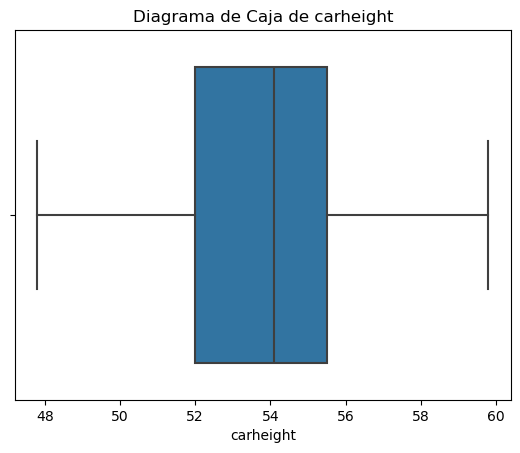

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


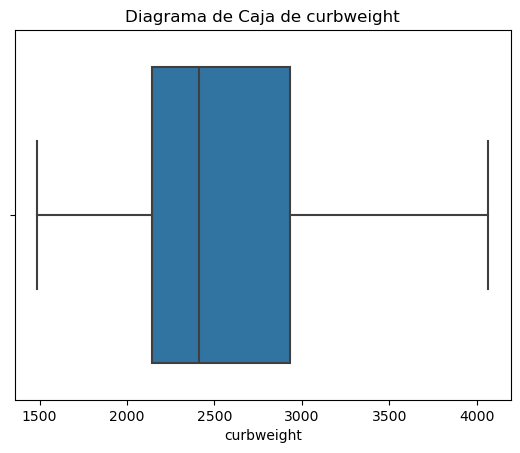

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


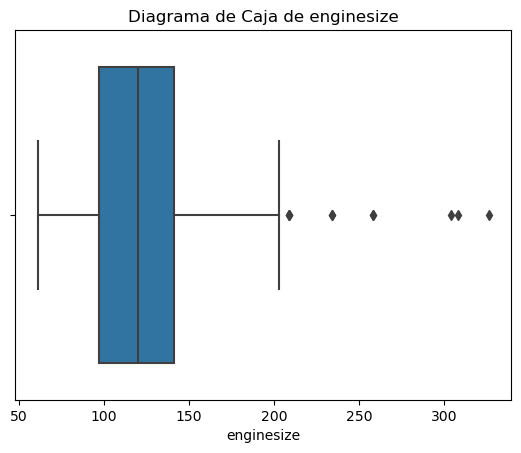

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


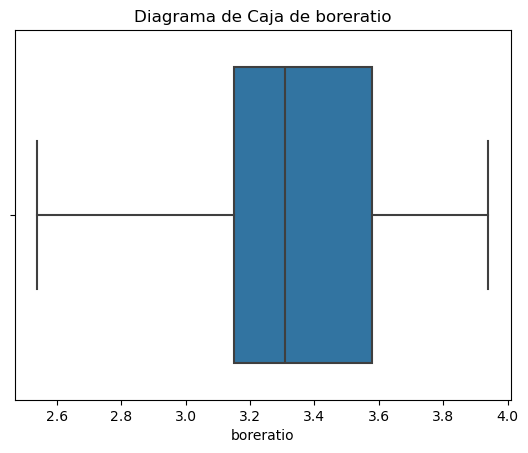

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


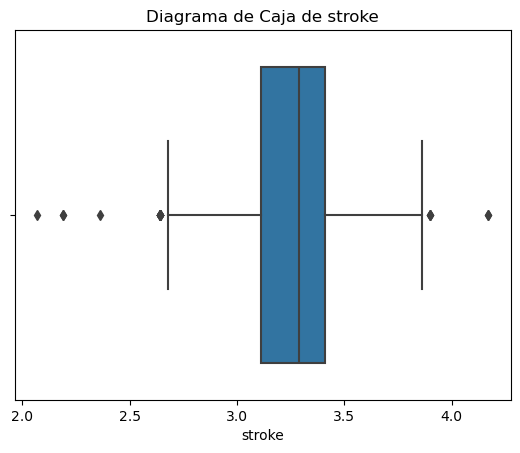

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


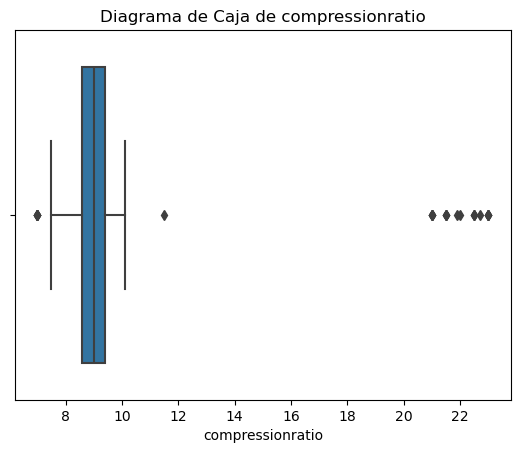

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


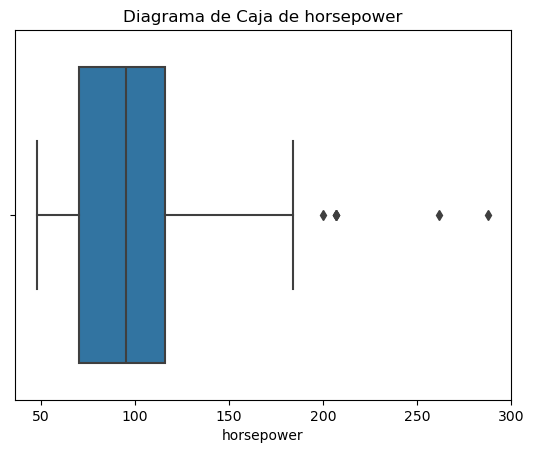

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


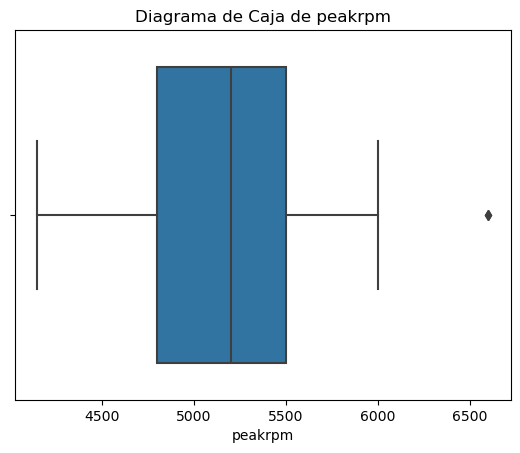

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


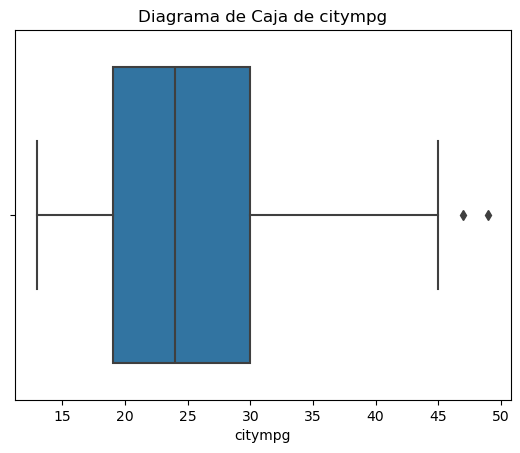

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


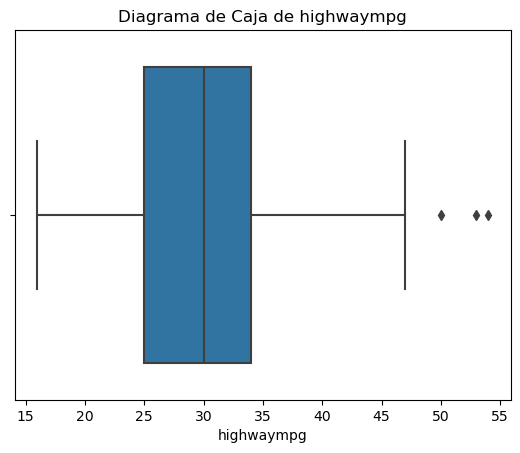

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


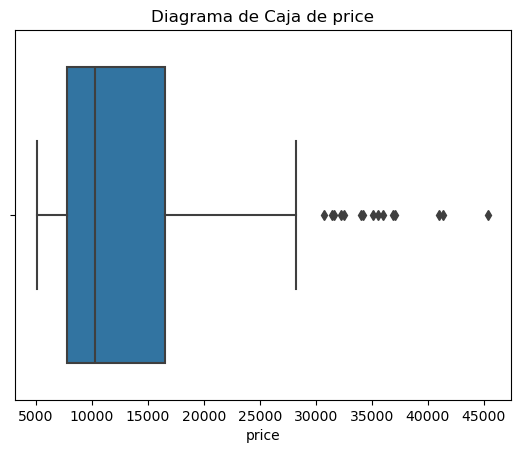

In [12]:
# Boxplots para variables numéricas
numeric_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                'peakrpm', 'citympg', 'highwaympg', 'price']

for var in numeric_vars:
    sns.boxplot(x=cars[var])
    plt.title(f'Diagrama de Caja de {var}')
    plt.show()

# Si hay datos atipicos ya que se representan como puntos fuera de las líneas que se extienden desde el rectángulo.


c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


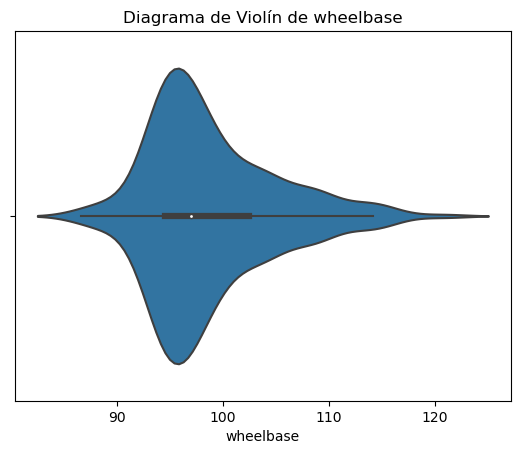

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


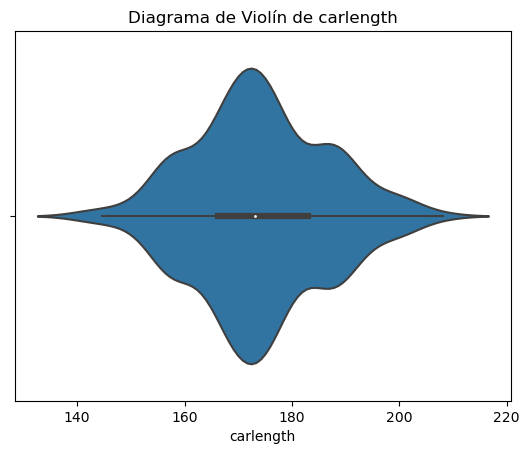

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


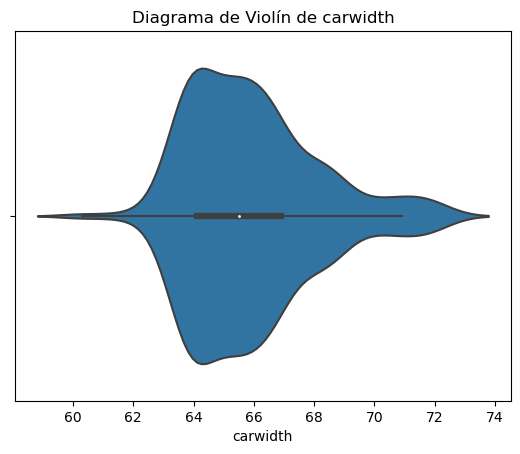

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


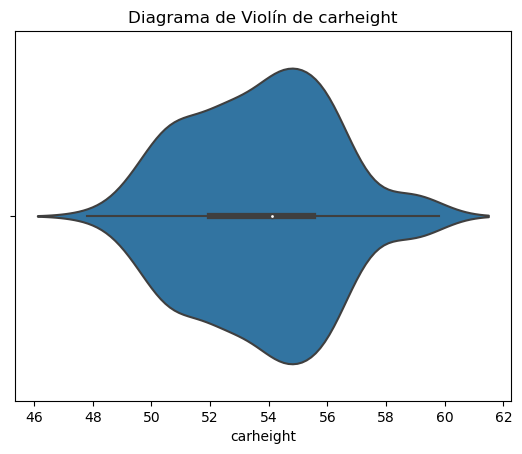

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


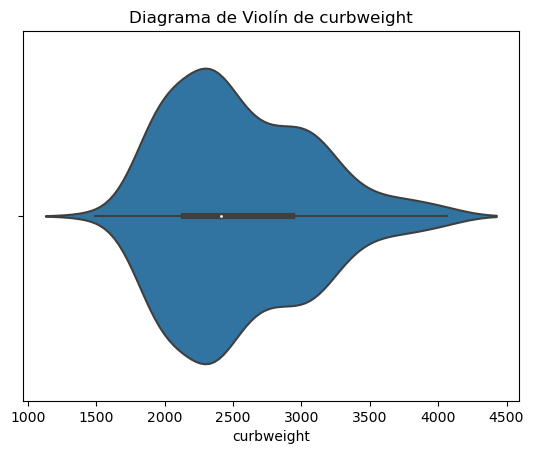

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


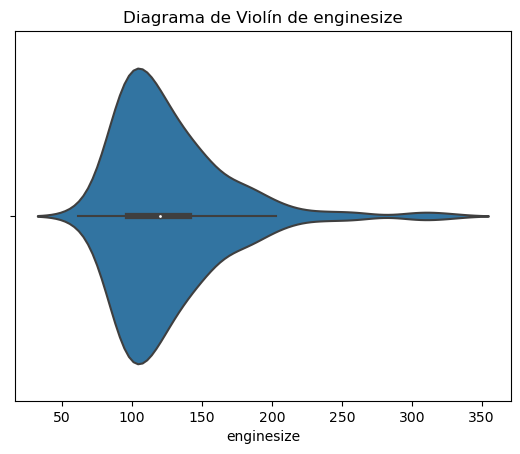

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


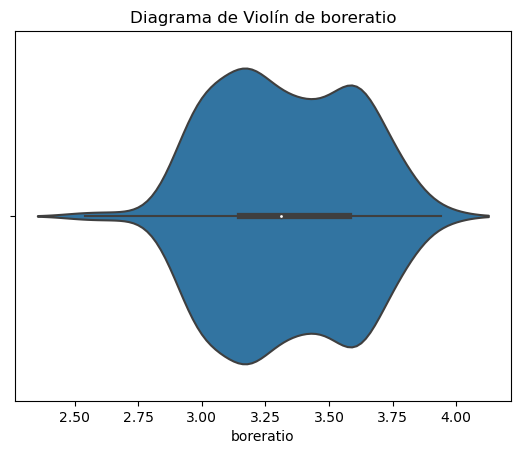

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


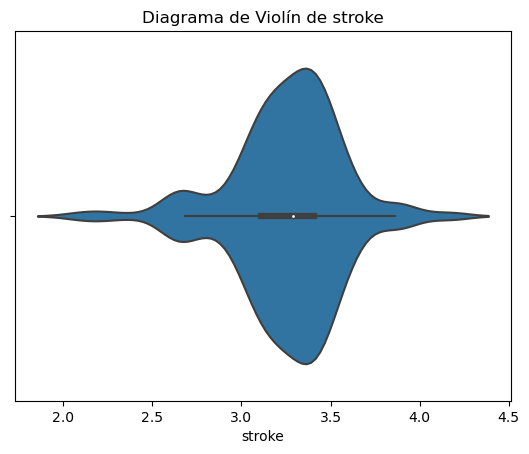

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


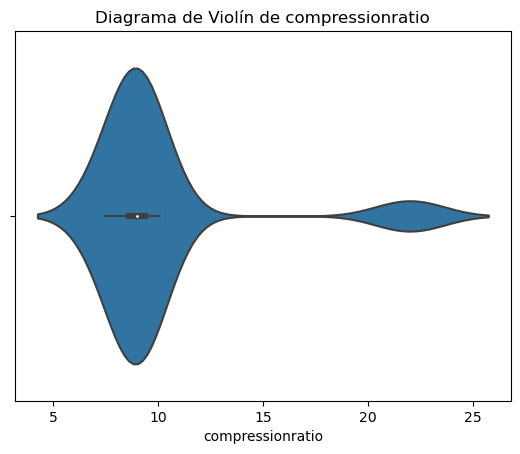

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


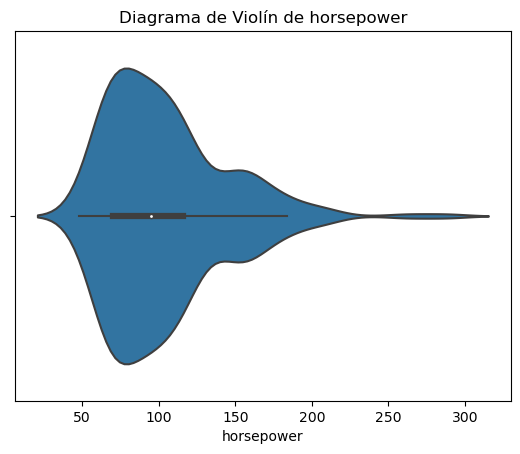

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


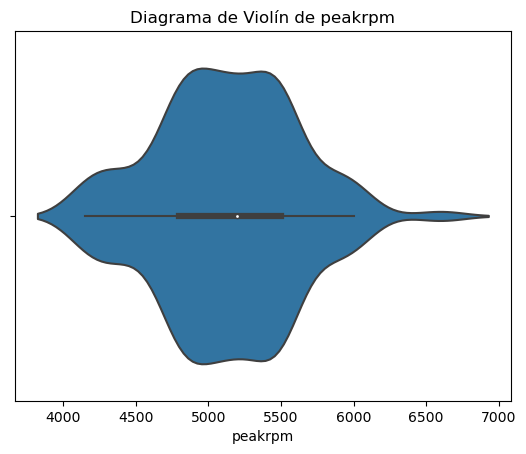

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


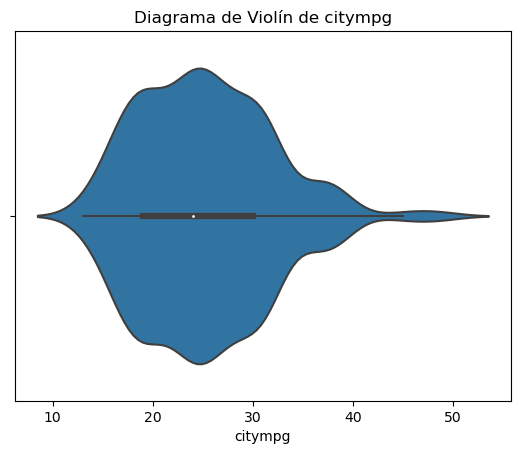

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


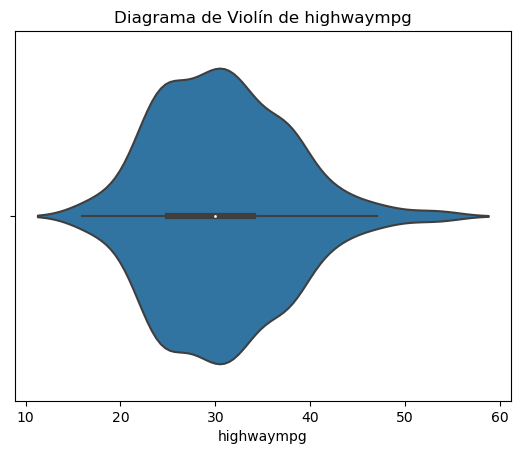

c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


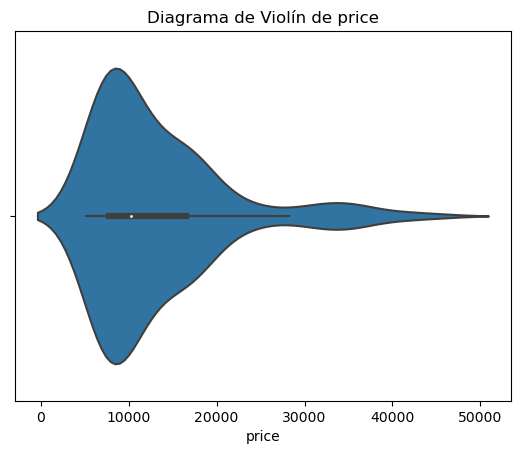

In [13]:
# Diagramas de Violín para variables numéricas
for var in numeric_vars:
    sns.violinplot(x=cars[var])
    plt.title(f'Diagrama de Violín de {var}')
    plt.show()
## Si hay datos atipicos ya que al observar las colas del violin en ambos extremos, vemos como se estrecha en ciertas áreas y hay datos que se extienden
# más allá de la forma principal del violín, tambien se ve anomalías en la forma del violín, hay protuberancias inusuales o formas extrañas en el violín.

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Los eliminaria ya que el conjuntos de datos es pequeño, estos valores atípicos pueden tener un impacto más pronunciado y podría ser una gran desviación en nuestros datos

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [15]:
# Verifico el número de valores únicos en cada columna
print(cars.nunique())

symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64


c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mjvm0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

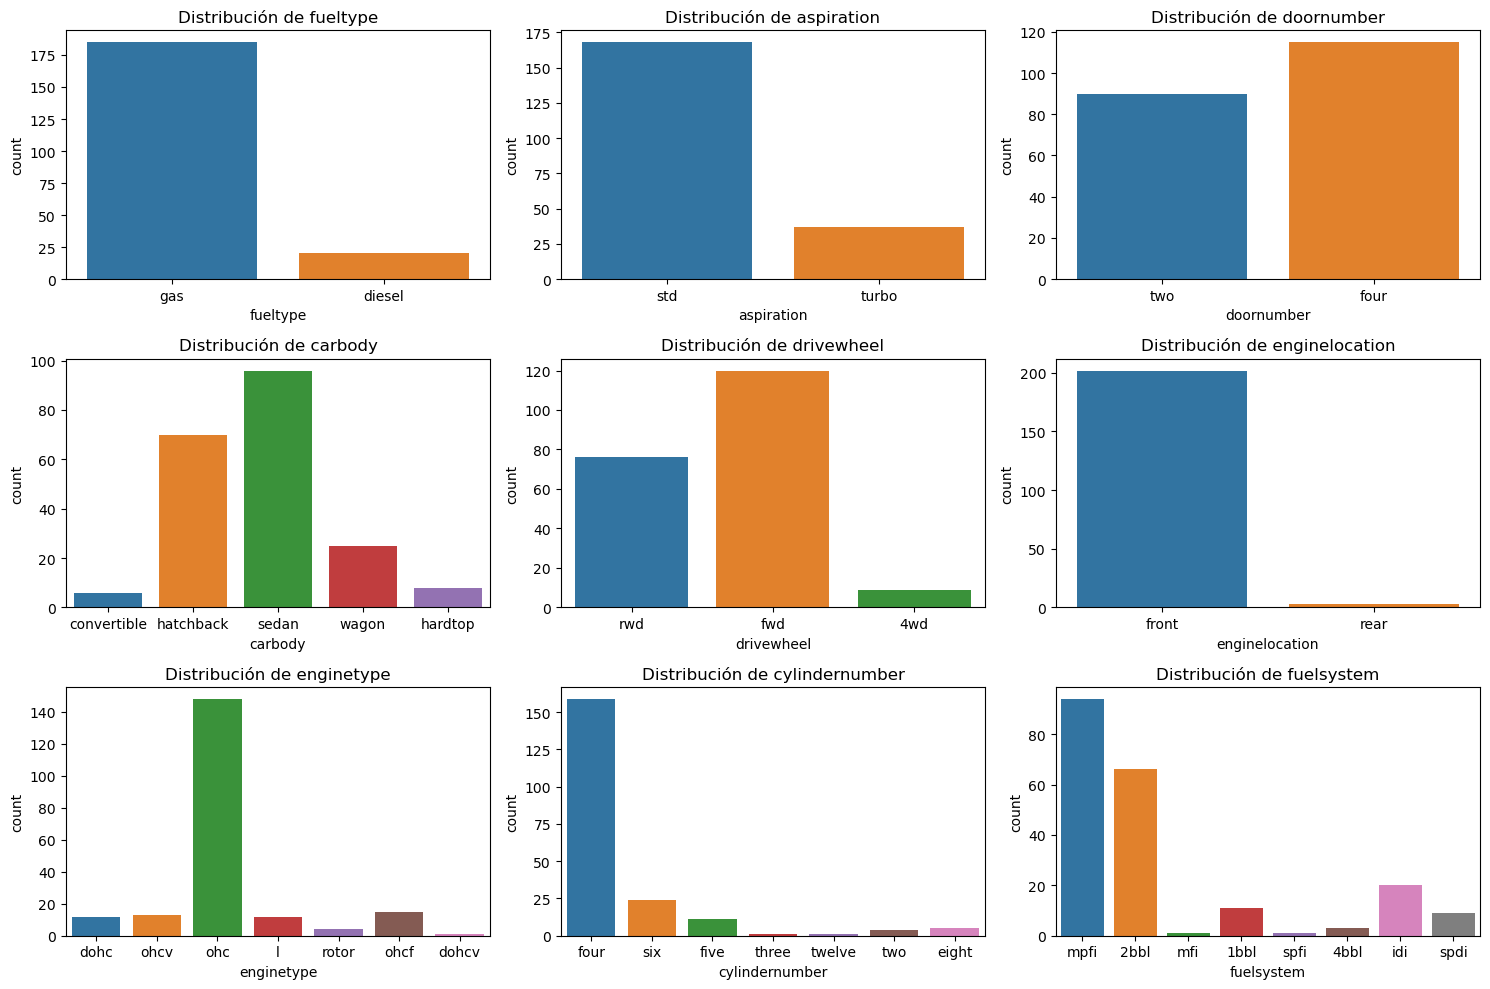

In [16]:
# Lista de variables categóricas
categoricas = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Configuro el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Itero sobre las variables categóricas y crear gráficos de barras
for i, var in enumerate(categoricas, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=cars)
    plt.title(f'Distribución de {var}')

# Ajusto el diseño
plt.tight_layout()
plt.show()


Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [17]:
# Verifico la cantidad de nulos por columna
nulos_por_columna = cars.isnull().sum()

# Muostro la cantidad de nulos por columna
print(nulos_por_columna)

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [18]:
# Eliminación de columnas con más de cierto porcentaje de nulos 
umbral_para_eliminar = 0.5  # 50% de nulos como umbral
columnas_a_eliminar = nulos_por_columna[nulos_por_columna / len(cars) > umbral_para_eliminar].index
cars = cars.drop(columns=columnas_a_eliminar)

#Se decide eliminar las columnas con más de cierto porcentaje de nulos ya que el dataset es muy pequeño y la  la pérdida de datos no es crítica, 
# considerando la proporción de nulos en el contexto de la cantidad total de datos disponibles. La pérdida de columnas con nulos no afecta significativamente
# la representación de los datos o la capacidad de realizar análisis y modelado de manera efectiva.

Para el caso de las variables numéricas, ¿Es necesario normalizar?

No es necesario ya que utilizamos algoritmos que no son sensibles a la escala de las variables, como los árboles de decisión o las redes neuronales, la normalización puede no ser estrictamente necesaria.

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un auto que sera clasficado como caro.


In [19]:
# Obtengo solo las columnas numéricas
columnas_numericas = cars.select_dtypes(include=[np.number])

# Creo una copia de las columnas numéricas
cars[columnas_numericas.columns] = cars[columnas_numericas.columns].fillna(cars[columnas_numericas.columns].mean()).copy()



In [20]:
# Obtengo solo las columnas categóricas
columnas_categoricas = cars.select_dtypes(include=[object])

# Imputo valores faltantes en variables categóricas con la moda
cars[columnas_categoricas.columns] = cars[columnas_categoricas.columns].fillna(cars[columnas_categoricas.columns].mode().iloc[0]).copy()

In [21]:
cars = pd.get_dummies(cars, columns=columnas_categoricas.columns, drop_first=True)

In [22]:
# Utilizo 'price' como el nombre de la variable objetivo
X = cars.drop('price', axis=1)
y = cars['price']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

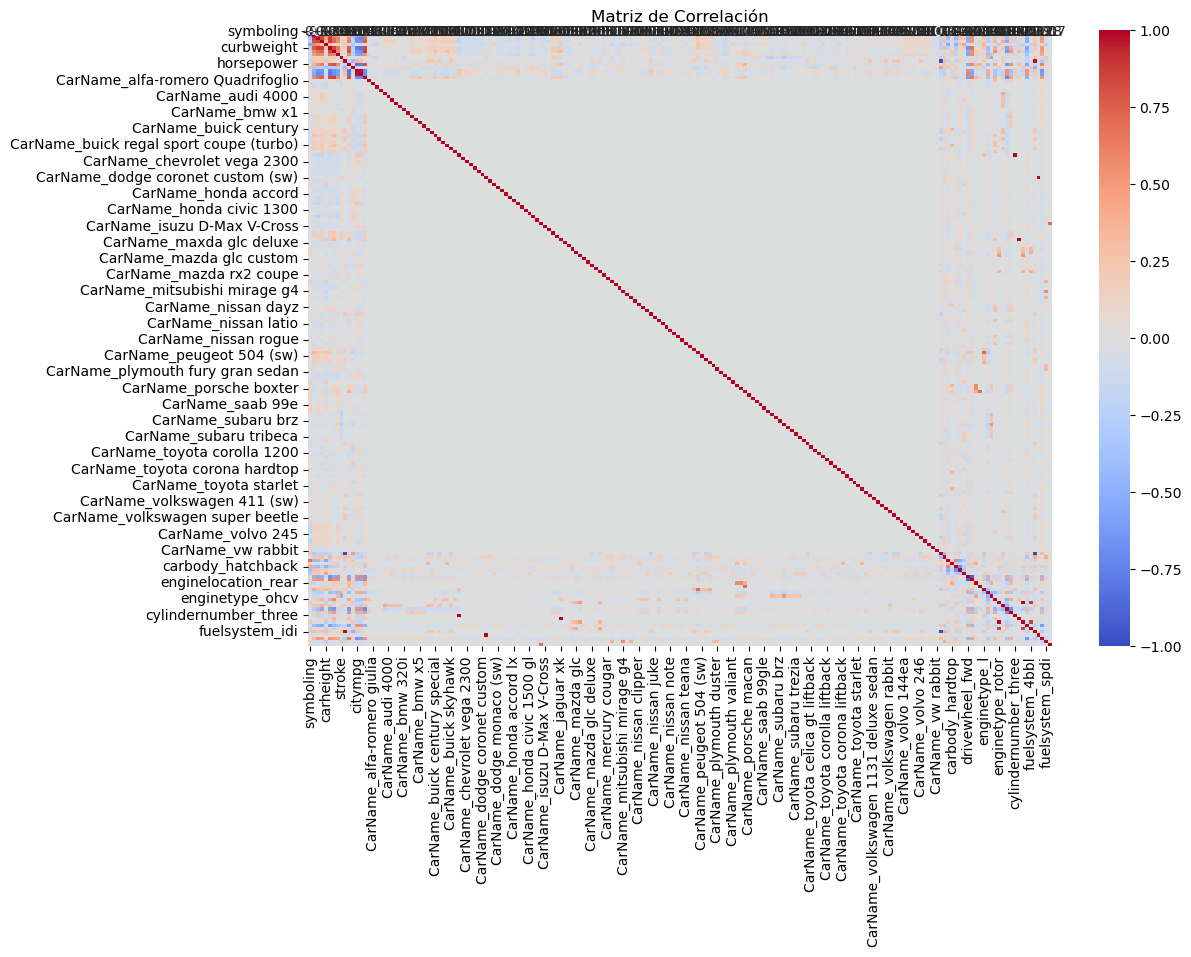

In [23]:
# Calculo la matriz de correlación
matriz_correlacion = cars.corr()

# Creo un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

#Si hay altas correlaciones, ya que el grafico nos indica que hay una alta valoración lineal entre esas dos variables desde "symboling" hasta "fuelsystem_spdi".
# Esto sugiere que estas dos variables están fuertemente correlacionadas y podrían contener información redundante. 
# Se  eliminara una de las variables para evitar la multicolinealidad en el modelo. ya que la multicolinealidad puede afectar negativamente la interpretación 
# del modelo y su estabilidad.

Para proceder, realizaremos un análisis más detallado de la evaluación entre esas dos variables y asi poder decidir cuáles conservar

In [24]:
# Calculo la matriz de correlación
matriz_correlacion = cars.corr()

# Selecciono la parte triangular superior de la matriz de correlación
triangular_superior = matriz_correlacion.where(np.triu(np.ones(matriz_correlacion.shape), k=1).astype(bool))

# Encuentro pares de variables con correlación superior a un umbral (por ejemplo, 0.8)
umbral_correlacion = 0.8
pares_correlacionados = [(fila, columna) for fila in triangular_superior.columns for columna in triangular_superior.columns if abs(triangular_superior.loc[fila, columna]) > umbral_correlacion]

# Muestro los pares de variables correlacionadas
for par in pares_correlacionados:
    print(f"Variables correlacionadas: {par[0]} y {par[1]}, Correlación: {triangular_superior.loc[par[0], par[1]]}")

# Puedes decidir conservar o eliminar una de las variables correlacionadas basándote en tu conocimiento del dominio y los requisitos del modelo.

Variables correlacionadas: wheelbase y carlength, Correlación: 0.874587475964264
Variables correlacionadas: carlength y carwidth, Correlación: 0.8411182684818453
Variables correlacionadas: carlength y curbweight, Correlación: 0.8777284608306433
Variables correlacionadas: carwidth y curbweight, Correlación: 0.8670324646791233
Variables correlacionadas: curbweight y enginesize, Correlación: 0.850594073426277
Variables correlacionadas: curbweight y price, Correlación: 0.8353048793372975
Variables correlacionadas: enginesize y horsepower, Correlación: 0.8097686545377302
Variables correlacionadas: enginesize y price, Correlación: 0.8741448025245117
Variables correlacionadas: compressionratio y fueltype_gas, Correlación: -0.9843560568767543
Variables correlacionadas: compressionratio y fuelsystem_idi, Correlación: 0.9843560568767543
Variables correlacionadas: horsepower y citympg, Correlación: -0.8014561756662708
Variables correlacionadas: horsepower y price, Correlación: 0.8081388225362214


Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

Viendo estos resultados podriamos ver las variables redundantes, variables altamente correlacionadas para evitar la multicolinealidad , decidir cuales conservar y cuales eliminar.

Tambien podemos ver las variables con evaluación negativa, investigar más a fondo estas relaciones para asegurarte de entender la naturaleza de la evaluación negativa y si es necesario mantener ambas variables.

Hay variables con optimización perfecta, como CarName_chevrolet impalay cylindernumber_three, tienen una calificación perfecta de 1.0. En este caso, podríamos decidir conservar una de las variables y eliminar la otra, ya que contiene la misma información.

Adicionalmente podemos realizar análisis adicionales de las relaciones entre las variables altamente correlacionadas utilizando visualizaciones más detalladas, como gráficos de dispersión o matrices de dispersión. Esto permitirá evaluar la naturaleza exacta de la relación y tomar decisiones más informadas sobre qué variables conservar y cuáles eliminar.

Después de realizar estos cambios, es importante revisar cómo afecta a el modelo, podemos ajustar el modelo de clasificación y evaluar el rendimiento utilizando métricas relevantes. Este paso es crucial para asegurarte de que la eliminación de variables redundantes no ha afectado negativamente la capacidad predictiva.

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [27]:
# Suponiendo que tu conjunto de datos preparado se llama 'cars' y ya contiene todas las transformaciones necesarias
cars.to_csv('C:/Users/mjvm0/OneDrive/Documentos/Proyecto integrador/Data/dataset_preparado.csv', index=False)